In [2]:
# Implementing the radial velocity/doppler formula for
# a planet with an elliptical orbit
# Read in data table for the mystery planet with columns:
#   time
#   RV (m/s)
#   error (m/s)
include("../../hw1/nicole/nicole_hw1_solver.jl")
using nicole_hw1_solver
using DataFrames
using PyPlot
using LsqFit

In [3]:
# Functions
function get_period(time,RV)
    t_N = 5000
    per_array = linspace(10.0,500.0,t_N)
    chi = zeros(t_N)
    for i in range(1,t_N)
        per_rems  = mod(time,per_array[i])
        per_where = sortperm(per_rems)
        rv_rems   = RV[per_where]
        #println(i)
        sum = 0.0
        for j in range(2,length(time)-2)
            sum += (rv_rems[j]-rv_rems[j-1])^2.
            #println(j)
        end
        chi[i] = sum
    end
    return per_array[indmin(chi)]
end

function get_M(per,time,t_peri)
    M   = 2 * pi/per *(time-t_peri)
    return M
end

function get_f(ecc,E)
    f   = 2.0 * atan(((1.0 + ecc)/(1.0 - ecc))^0.5 * tan(E/2.0))
    return f
    end
    
function get_vrad(time,init_param)
    vrad = zeros(length(time))
    ecc = init_param[2]
    if (ecc >= 1) || (ecc < 0)
    vrad = 0
    end
    for k in range(1,length(time)-1)
        #println(k)
        M = get_M(init_param[1],time[k],init_param[3])
        E = nicole_hw1_solver.solver_loop(M,ecc)
        f = get_f(ecc,E) 
        vrad[k] = init_param[4]*cos(f) + init_param[5]*sin(f) + init_param[6]
        #println(vrad[k])
    end
    return vrad
end


get_vrad (generic function with 1 method)

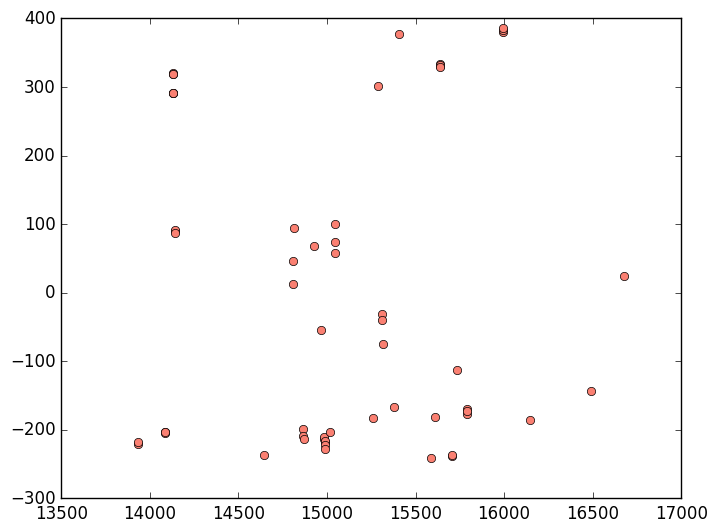

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3268845f8>

In [4]:
planet_data = readtable("mystery_planet.txt", separator =' ')

N = length(planet_data[1])
time   = convert(Array,planet_data[1])  
RV     = convert(Array,planet_data[2]) # m/s
RV_err = convert(Array,planet_data[3]) # m/s

tfold_best = get_period(time,RV)

plot(time,RV,marker="o",linestyle="None",color="Salmon")

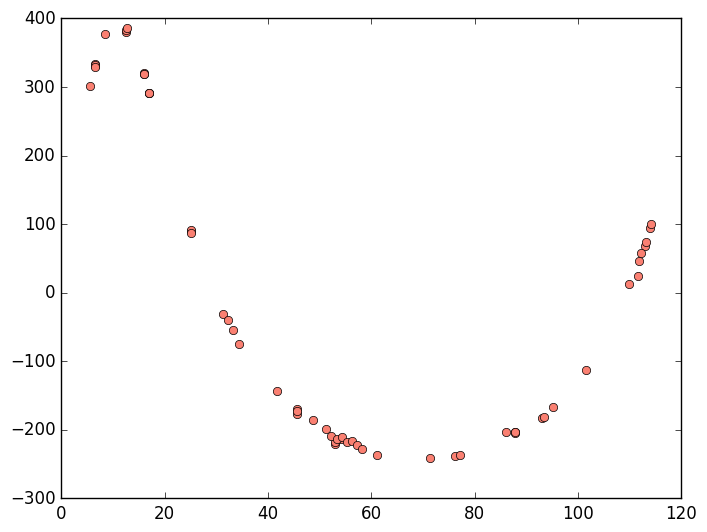

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3265344e0>

In [5]:
tfold_best = get_period(time,RV)
#println(tfold_best)
time_new    = rem(time,tfold_best)
plot(time_new,RV,marker="o",linestyle="None",color="Salmon")

In [11]:
# Initiate starting values (guesses)
kay = (maximum(RV) - minimum(RV))/2

per_0  = tfold_best
ecc_0  = 0.5
t_per0 = rand()*per_0
h_0    = kay/2
c_0    = h_0
v_0    = 1.0
p_0 = [per_0,ecc_0,t_per0,h_0,c_0,v_0]
err = 1.0./(RV_err.^2)
println(' ')

In [14]:
fit      = curve_fit(get_vrad, time, RV, err, p_0)
rv_model = get_vrad(time,fit.param)

per_fit = fit.param[1]
ecc_fit = fit.param[2]
t_per_fit = fit.param[3]
h_fit   = fit.param[4]
c_fit   = fit.param[5]
v0_fit  = fit.param[6]

time_new   = rem(time,per_fit)
time_model = rem(time,per_fit)
println(fit.param)

[116.678,0.400172,123.361,315.904,4.69342,74.4259]


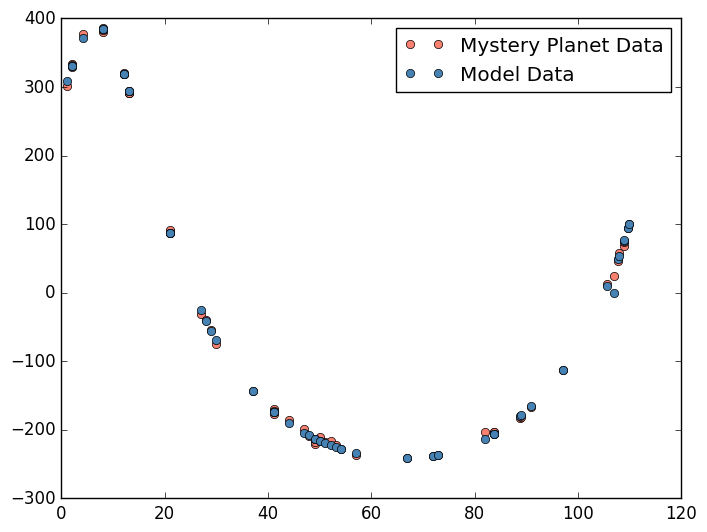

PyObject <matplotlib.legend.Legend object at 0x326702b00>

In [15]:
plot(time_new,RV,marker="o",linestyle="None",color="Salmon",label="Mystery Planet Data")
plot(time_model,rv_model,marker="o",linestyle="None",color="SteelBlue",label="Model Data")
legend()